In [1]:
import numpy as np
import numba as nb
from scipy.stats import maxwell
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from copy import copy
from matplotlib.widgets import Slider
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from scipy.spatial import distance

In [2]:
NVAR = 5
PVAR = NVAR-1
N = 50
R = 0.15
GA = 0.2
RA = 10
PA = 1/30
dt = 0.01
ms = 5
PRED_NOISE = 0.02
RADIUS_PRED = 0.2
Niterations = 100
MAX_SPEED = 0.01/dt
PRED_SPEED = MAX_SPEED #NEW
DECAY_RATE = 0.995

<ipython-input-5-8ec7e6237d54>:16: RuntimeWarning: divide by zero encountered in log
  im = ax.imshow(np.log(data),cmap="hot", origin="Bottom", interpolation='none',extent=[bins[0],bins[-1],0,Niterations],aspect="auto")


Text(0.5, 1.0, 'Log(Bincount) per iterations of the velocties all runs and bunnies')

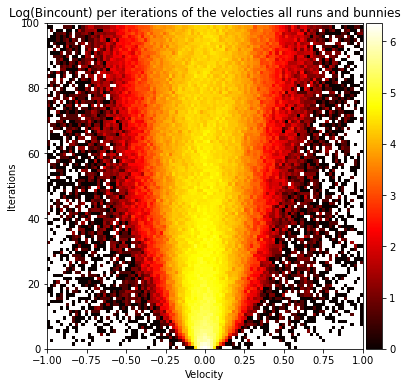

In [5]:
rab = np.load("runs/{}_{}_{}_{}_rabbits.npy".format(N, 1, Niterations, 50))
pred = np.load("runs/{}_{}_{}_{}_pred.npy".format(N, 1, Niterations, 50))

rab_r = np.sqrt(rab[:,:,:,0]**2 + rab[:,:,:,1]**2)
rab_V = np.diff(rab_r,axis=1)/dt

binning = 101
bins = np.linspace(-MAX_SPEED,MAX_SPEED,binning+1)
data = np.zeros((Niterations, binning))

for i in range(Niterations-1):
    counts, _ = np.histogram(rab_V[:,i,:],bins=bins)
    data[i,:] = counts
    
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(np.log(data),cmap="hot", origin="Bottom", interpolation='none',extent=[bins[0],bins[-1],0,Niterations],aspect="auto")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)
ax.set_ylabel("Iterations")
ax.set_xlabel("Velocity")
ax.set_title("Log(Bincount) per iterations of the velocties all runs and bunnies")

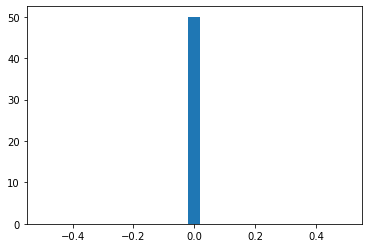

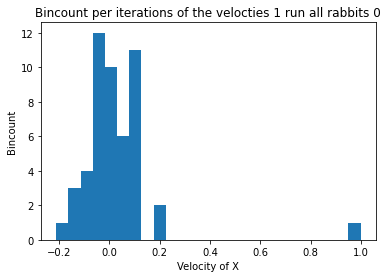

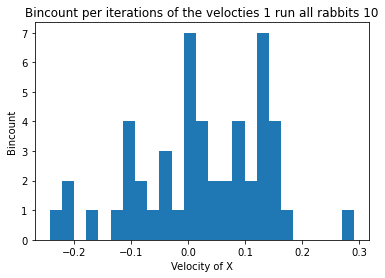

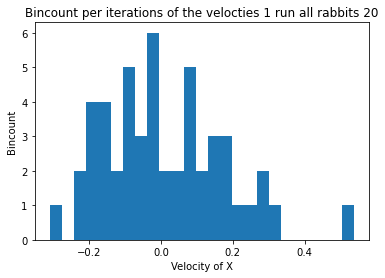

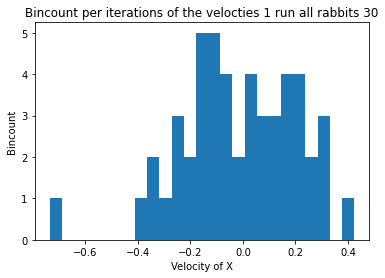

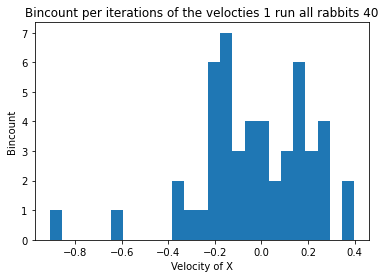

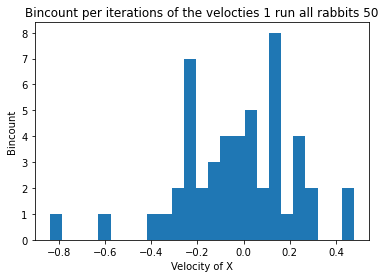

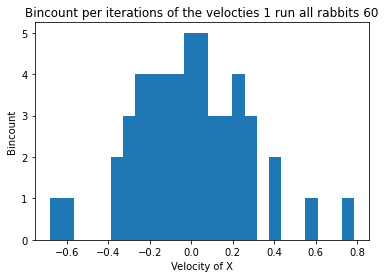

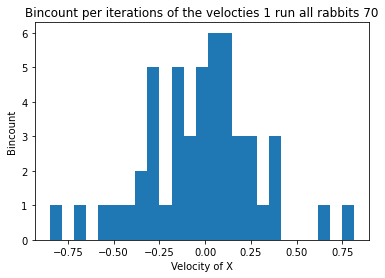

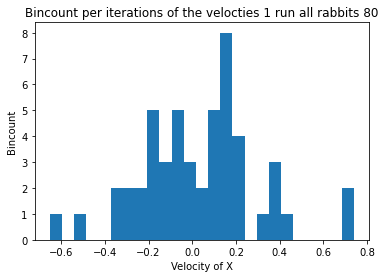

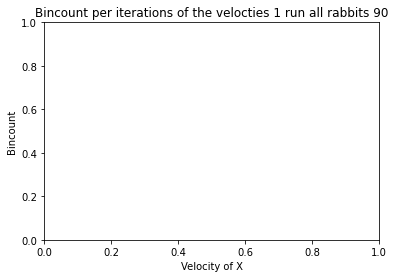

In [11]:
#COMBINE BELOW for ANIMATION
for i in range(0,Niterations,10):
    plt.hist(rab[0,i,:,2].flatten(),bins=25)
    plt.show()
    plt.ylabel("Bincount")
    plt.xlabel("Velocity of X")
    plt.title("Bincount per iterations of the velocties 1 run all rabbits %i"%i)

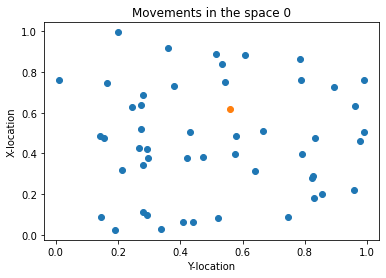

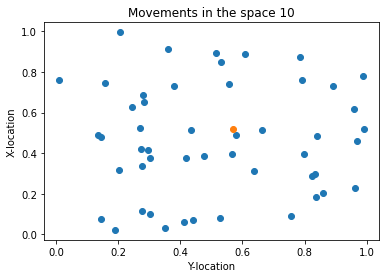

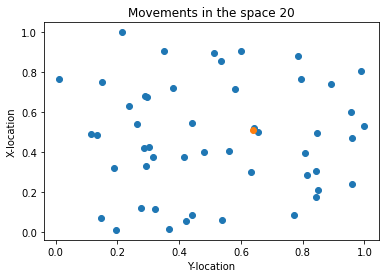

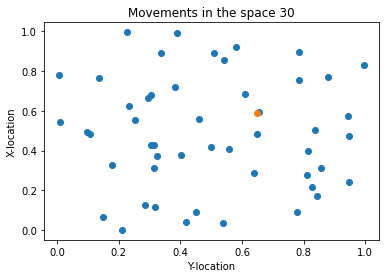

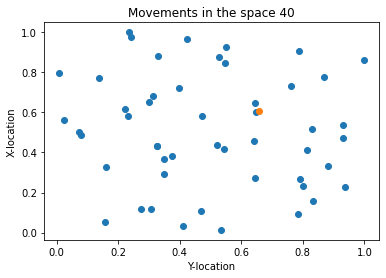

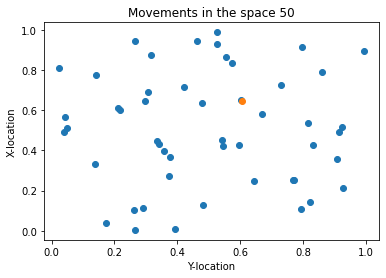

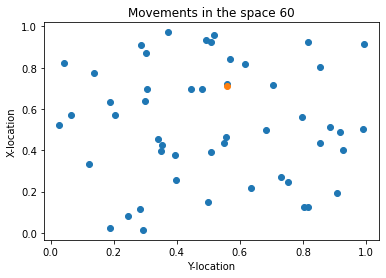

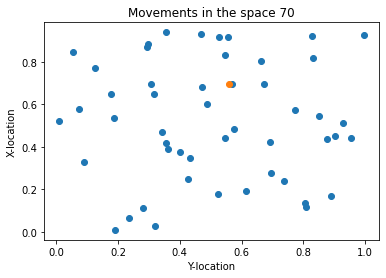

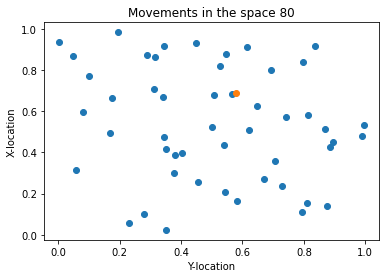

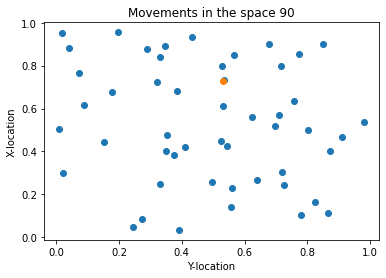

In [10]:
for i in range(0,Niterations,10):
    plt.scatter(rab[0,i,:,0],rab[0,i,:,1])
    plt.scatter(pred[0,i,:,0],pred[0,i,:,1])
    plt.ylabel("X-location")
    plt.xlabel("Y-location")
    plt.title("Movements in the space %i"%i)
    
    plt.show()
   

Text(0.5, 1.0, 'Heatmap per site for all iterations, runs amd bunnies')

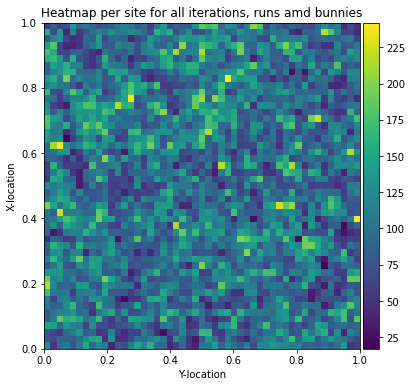

In [12]:
bins=np.linspace(0,1,50)

hist= np.histogram2d(rab[:,:,:,0].flatten(),rab[:,:,:,1].flatten(),bins=[bins,bins])
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(hist[0],origin="Bottom",extent =[0,1,0,1], interpolation='none',aspect="auto")
divider = make_axes_locatable(ax)
ax.set_title(i)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)
ax.set_ylabel("X-location")
ax.set_xlabel("Y-location")
ax.set_title("Heatmap per site for all iterations, runs amd bunnies")

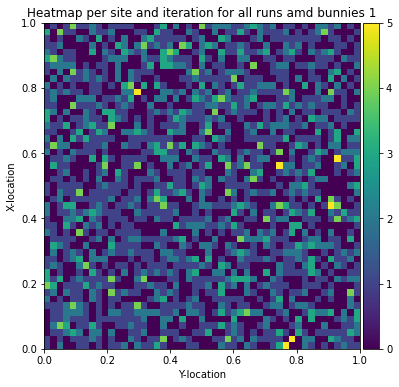

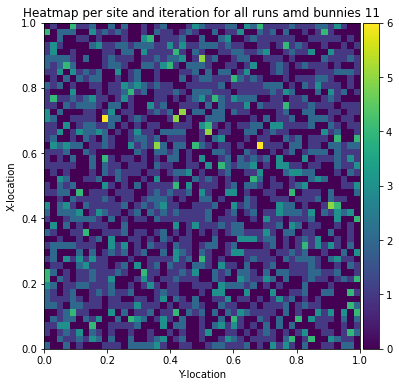

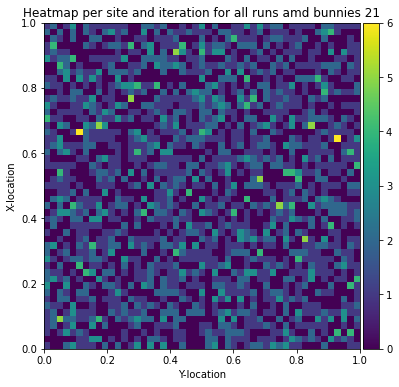

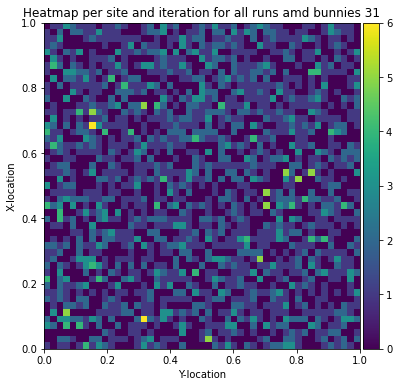

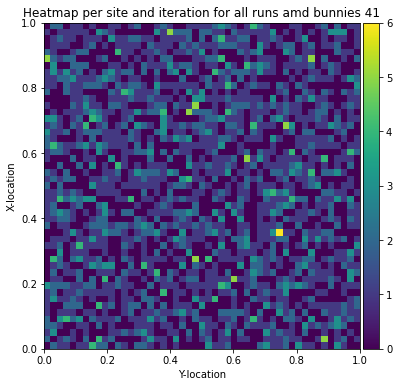

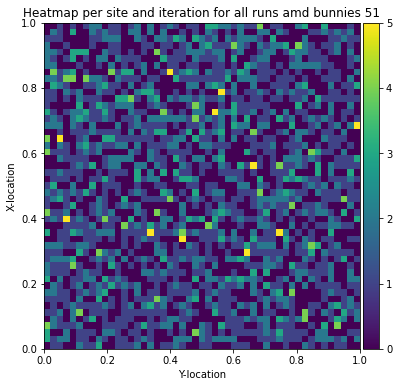

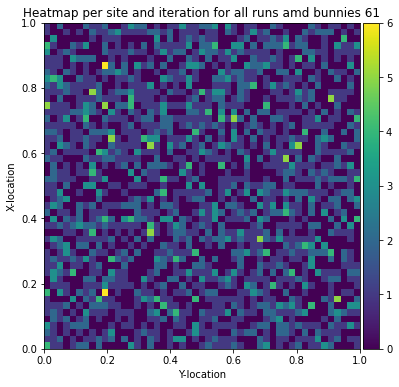

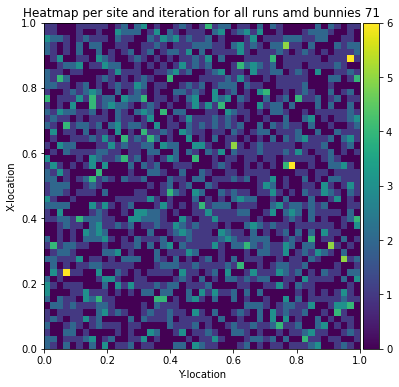

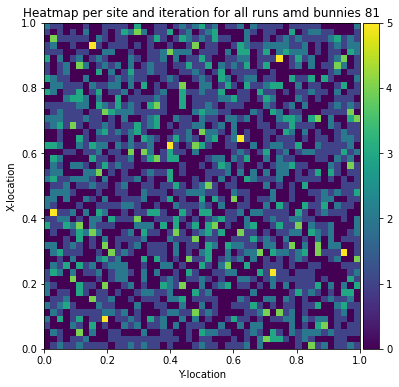

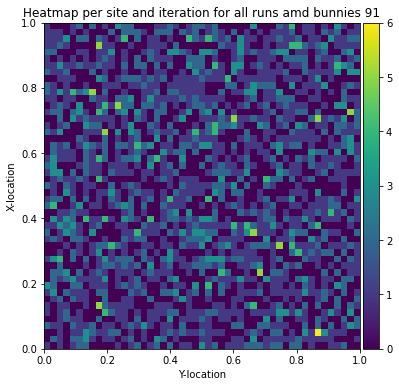

In [14]:
bins=np.linspace(0,1,50)
rab = np.load("runs/{}_{}_{}_{}_rabbits.npy".format(N, 1, Niterations, 50))
for i in range(1,Niterations,10):
    hist= np.histogram2d(rab[:,i,:,0].flatten(),rab[:,i,:,1].flatten(),bins=[bins,bins])
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(hist[0],origin="Bottom",extent =[0,1,0,1], interpolation='none',aspect="auto")
    divider = make_axes_locatable(ax)
    ax.set_title(i)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)
    ax.set_ylabel("X-location")
    ax.set_xlabel("Y-location")
    ax.set_title("Heatmap per site and iteration for all runs amd bunnies %i"%i)

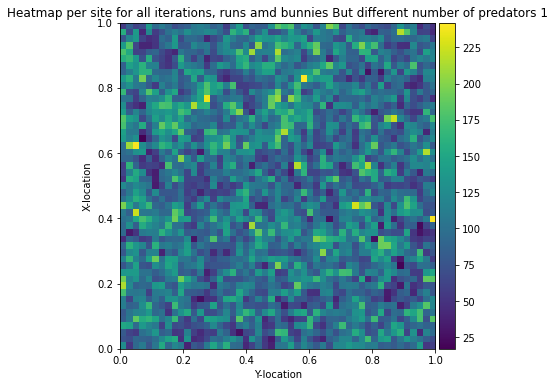

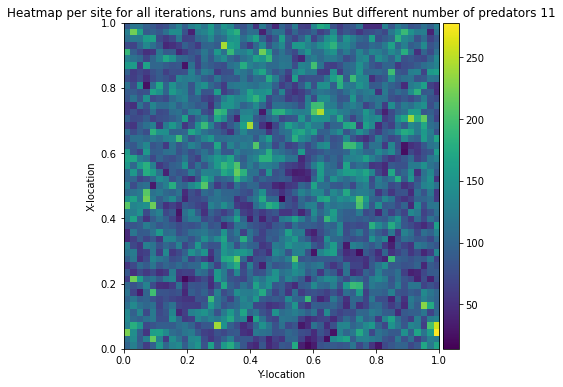

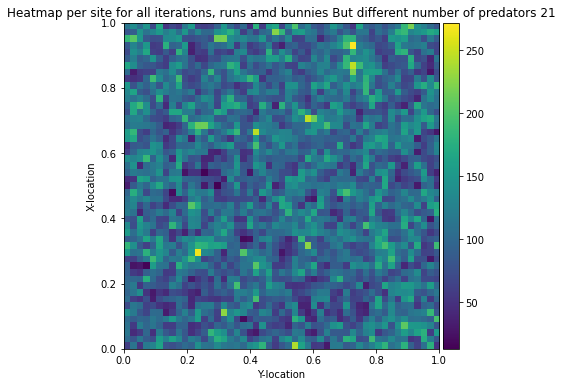

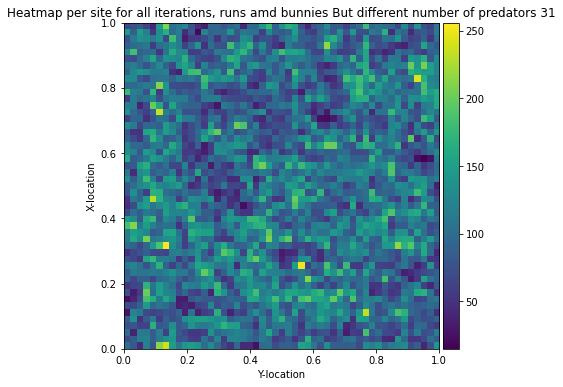

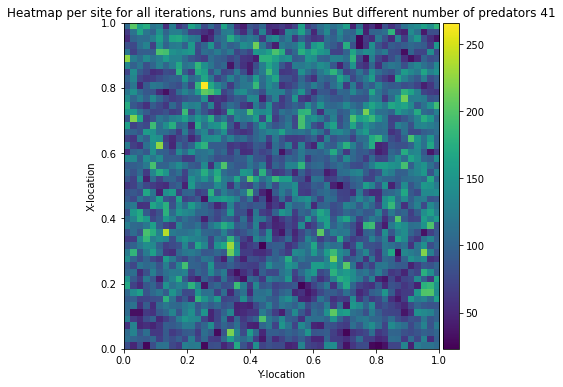

In [15]:
#MAke ANIMATION
bins=np.linspace(0,1,50)
for i in range(1,N,10):
    rab = np.load("runs/{}_{}_{}_{}_rabbits.npy".format(N, i, Niterations, 50))
    hist= np.histogram2d(rab[:,:,:,0].flatten(),rab[:,:,:,1].flatten(),bins=[bins,bins])
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(hist[0],origin="Bottom",extent =[0,1,0,1], interpolation='none',aspect="auto")
    divider = make_axes_locatable(ax)
    ax.set_title(i)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)
    ax.set_ylabel("X-location")
    ax.set_xlabel("Y-location")
    ax.set_title("Heatmap per site for all iterations, runs amd bunnies But different number of predators %i"%i)